# Figures Primer (Matplotlib)

This primer is a reference for creating figures that **support your reasoning** in physics problems.

In this course, figures are used to:
- define a coordinate system,
- show vectors and components,
- visualize functions or data,
- illustrate areas under curves (integral meaning),
- and (optionally) create short animations.

You do **not** need to memorize plotting syntax. Use this notebook as a template and copy patterns when needed.

> **In class:** we will focus mainly on **plotting functions and data**.  
> The other sections are here so you can return to them later.


## Setup

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# For nicer default sizing in notebooks
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["figure.dpi"] = 120


## Plotting Functions and Data

A good physics figure answers a question and supports a specific claim. In scientific and engineering work, the explanation of a figure is typically provided in the **figure caption**, not in the plot itself. As a result, plots generally **do not use titles**.

Instead, a well-constructed figure should include:
- axis labels **with units**,
- readable scales,
- a **legend or annotation** that identifies what is being shown.

The goal is that someone can understand *how to read the figure* even before reading the caption.

### Example: Plot a function

We will plot the function $x(t) = 2t^2$ from $t=0$ to $t=5\,\text{s}$, and label the curve directly on the figure.

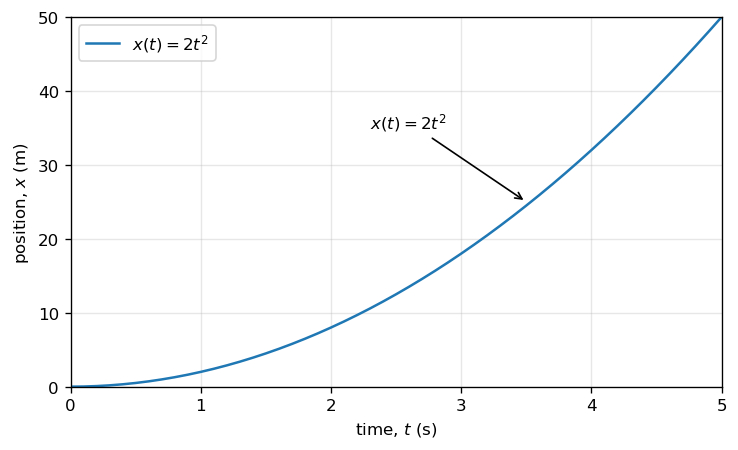

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function x(t) = 2 t^2
t = np.arange(0, 5.0 + 0.025, 0.025)      # time in seconds
x = 2 * t**2                   # position in meters

# Create figure and axes
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the data
ax.plot(t, x, label=r"$x(t)=2t^2$")

#Set axis limits to reduce white space
ax.set_xlim(0,5)
ax.set_ylim(0,50)
# Label axes with units
ax.set_xlabel("time, $t$ (s)")
ax.set_ylabel("position, $x$ (m)")
# Identify the curve; use either legend or annotate in practice
ax.legend()
ax.annotate(r"$x(t)=2t^2$",xy=(3.5, 25),
    xytext=(2.3, 35),arrowprops=dict(arrowstyle="->"))
# Optional visual aids
ax.grid(True, alpha=0.3)

plt.show()
#use fig.savefig("myfile.png",bbox_inches='tight) to save figure to a file

### Mini Exercise 1

Plot the function
$$
v(t)=3t-2
$$
from $t=0$ to $t=6\,\text{s}$. Label axes with units and include a legend or annotation.


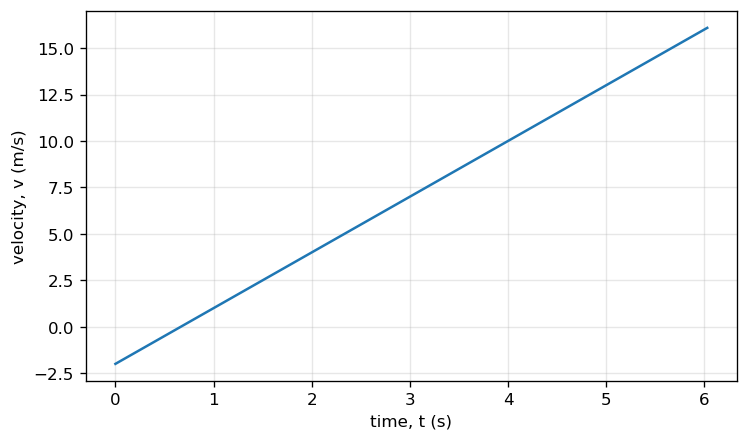

In [27]:
# TODO: Mini Exercise 1
t = np.arange(0, 6.0 + 0.03, 0.03)
v = 3*t - 2

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, v)
ax.set_xlabel("time, t (s)")
ax.set_ylabel("velocity, v (m/s)")
ax.grid(True, alpha=0.3)
plt.show()


### Example: Plot data with markers

Sometimes you have measured data points. Use markers so the points are visible.


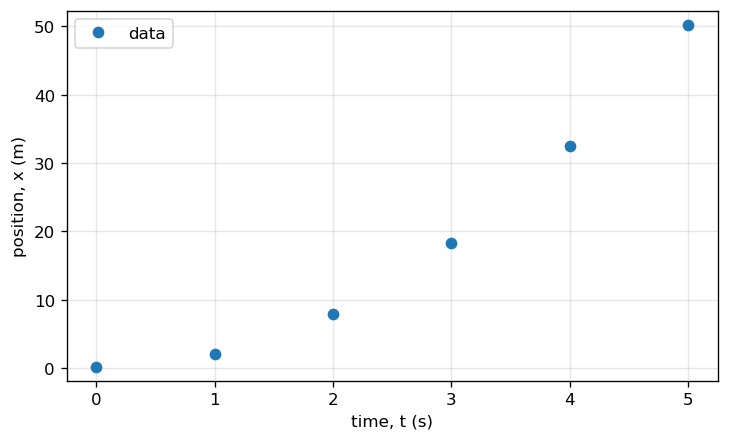

In [28]:
# Example data (time in s, position in m)
t_data = np.array([0, 1, 2, 3, 4, 5])
x_data = np.array([0.2, 2.1, 7.9, 18.3, 32.5, 50.2])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_data, x_data, "o", label="data")
ax.set_xlabel("time, t (s)")
ax.set_ylabel("position, x (m)")

# Tight limits to reduce excess whitespace
ax.set_xlim(t_data.min() - 0.25, t_data.max() + 0.25)
ax.set_ylim(x_data.min() - 2, x_data.max() + 2)
ax.grid(True, alpha=0.3)
ax.legend()
plt.show()


### Mini Exercise 2

On the same axes, plot the data points *and* a model curve of your choice (for example, a quadratic fit).  
Explain (in a Markdown cell) what your model represents physically.


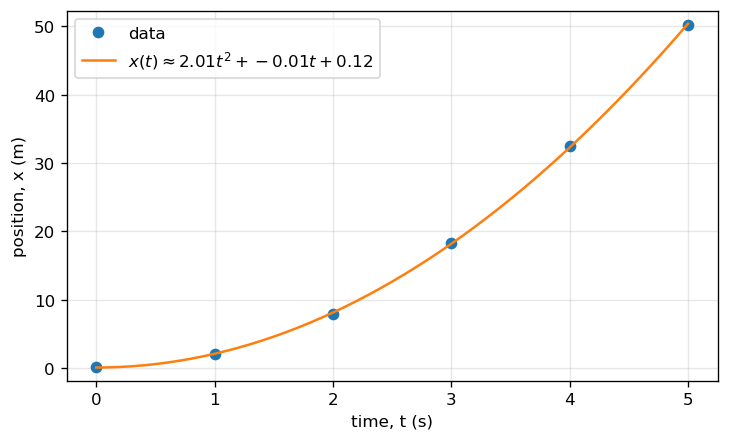

In [29]:
# TODO: Mini Exercise 2 (one possible approach: polynomial fit)
t_data = np.array([0, 1, 2, 3, 4, 5])
x_data = np.array([0.2, 2.1, 7.9, 18.3, 32.5, 50.2])

# Fit a quadratic model x(t) = a t^2 + b t + c
coeff = np.polyfit(t_data, x_data, deg=2)
a, b, c = coeff
t_fit = np.arange(t_data.min(), t_data.max() + 0.025, 0.025)
x_fit = a*t_fit**2 + b*t_fit + c

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_data, x_data, "o", label="data")
ax.plot(t_fit, x_fit, "-", label=rf"$x(t)\approx {a:.2f}t^2 + {b:.2f}t + {c:.2f}$")
ax.set_xlabel("time, t (s)")
ax.set_ylabel("position, x (m)")

# Tight limits to reduce excess whitespace
ax.set_xlim(t_data.min() - 0.25, t_data.max() + 0.25)
ax.set_ylim(x_data.min() - 2, x_data.max() + 2)
ax.grid(True, alpha=0.3)
ax.legend()
plt.show()


## Drawing Vectors (Arrows and Annotations)

Vectors are best shown when you:
- choose and label axes,
- draw the arrow from a clear tail point,
- and label the vector (and/or components).

Two common tools:
- `plt.quiver(...)` for vector arrows
- `plt.annotate(...)` for custom arrows and labels


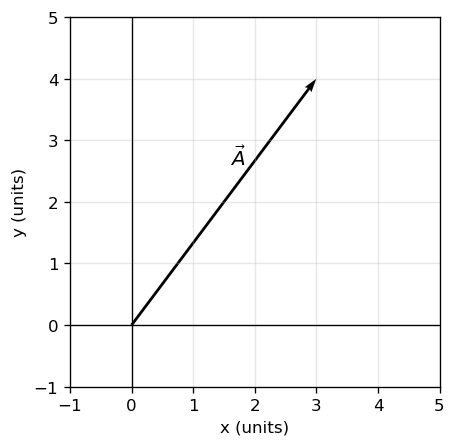

In [30]:
# Example: a vector from the origin to (3,4)
x, y = 3, 4

fig = plt.figure()
ax = fig.add_subplot(111)
ax.axhline(0, color="k", linewidth=0.8)
ax.axvline(0, color="k", linewidth=0.8)

ax.quiver(0, 0, x, y, angles="xy", scale_units="xy", scale=1)
ax.text(0.6*x - 0.2, 0.6*y + 0.2, r"$\vec{A}$", fontsize=12)

ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("x (units)")
ax.set_ylabel("y (units)")
ax.grid(True, alpha=0.3)
plt.show()


### Mini Exercise 3

Draw two vectors from the origin, $\vec{A}=(3,4)$ and $\vec{B}=(-2,3)$, and label them.


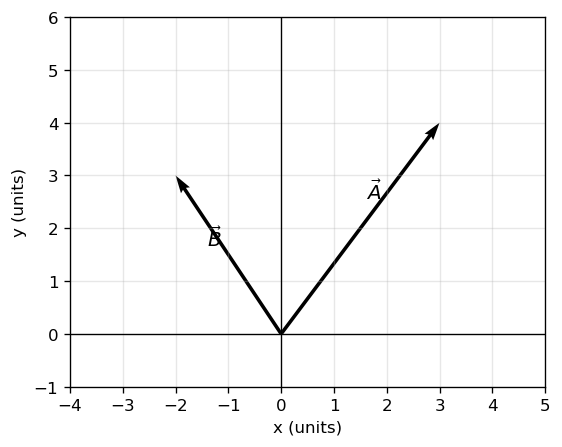

In [31]:
# TODO: Mini Exercise 3
A = np.array([3, 4])
B = np.array([-2, 3])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.axhline(0, color="k", linewidth=0.8)
ax.axvline(0, color="k", linewidth=0.8)

ax.quiver(0, 0, A[0], A[1], angles="xy", scale_units="xy", scale=1)
ax.quiver(0, 0, B[0], B[1], angles="xy", scale_units="xy", scale=1)

def label_vector(ax, vec, label, frac=0.6, offset=0.25):
    # Place label along the vector with a small perpendicular offset
    v = np.array(vec, dtype=float)
    base = frac * v
    # Perpendicular direction
    perp = np.array([-v[1], v[0]], dtype=float)
    n = np.linalg.norm(perp)
    if n != 0:
        perp = perp / n
    pos = base + offset * perp
    ax.text(pos[0], pos[1], label, fontsize=12)

label_vector(ax, A, r"$\vec{A}$")
label_vector(ax, B, r"$\vec{B}$")

ax.set_xlim(-4, 5)
ax.set_ylim(-1, 6)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("x (units)")
ax.set_ylabel("y (units)")
ax.grid(True, alpha=0.3)
plt.show()


## Shading Area Under a Curve

Shading is useful when an area has physical meaning, such as:
- displacement as the area under a velocity–time curve,
- work as the area under a force–displacement curve,
- impulse as the area under a force–time curve.

Use `plt.fill_between(...)`.


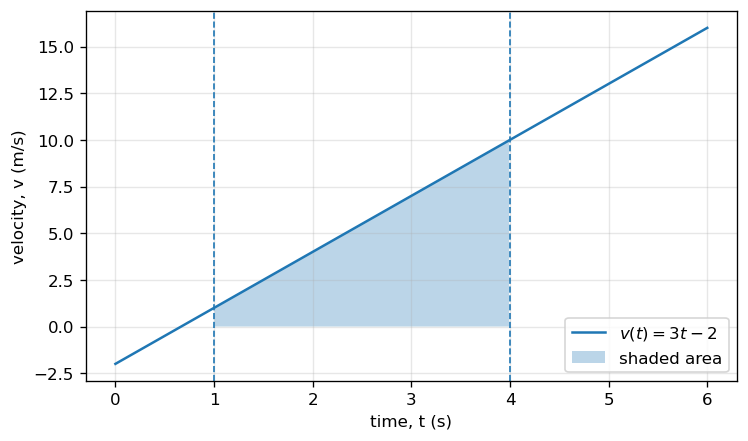

In [32]:
# Example: shade displacement under v(t) from t=1 to t=4
t = np.arange(0, 6.0 + 0.015, 0.015)
v = 3*t - 2

t1, t2 = 1, 4
mask = (t >= t1) & (t <= t2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, v, label=r"$v(t)=3t-2$")
ax.fill_between(t[mask], v[mask], alpha=0.3, label="shaded area")

ax.axvline(t1, linestyle="--", linewidth=1)
ax.axvline(t2, linestyle="--", linewidth=1)

ax.set_xlabel("time, t (s)")
ax.set_ylabel("velocity, v (m/s)")
ax.grid(True, alpha=0.3)
ax.legend()
plt.show()


### Mini Exercise 4

Shade the area under $F(x)=5x$ from $x=0$ to $x=3\,\text{m}$.  
Write one sentence: what does this shaded area represent physically?


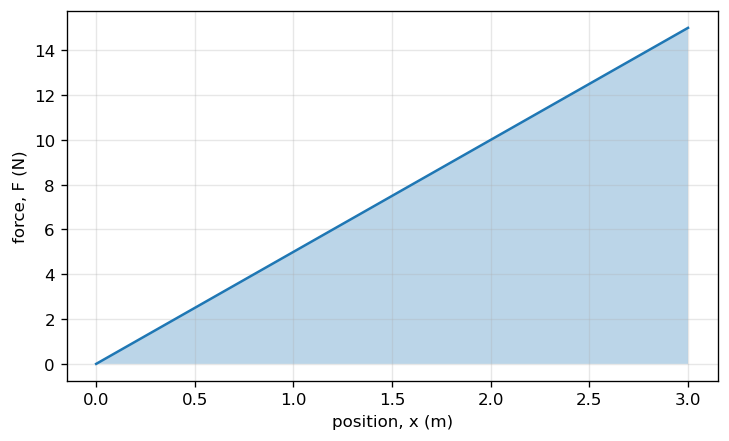

In [33]:
# TODO: Mini Exercise 4
x = np.linspace(0, 3, 300)
F = 5*x

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, F, label=r"$F(x)=5x$")
ax.fill_between(x, F, alpha=0.3)
ax.set_xlabel("position, x (m)")
ax.set_ylabel("force, F (N)")
ax.grid(True, alpha=0.3)
plt.show()


## Short Animations (Optional)

Animations are optional, but they can be helpful for visualizing motion or changing vectors.

We will use `matplotlib.animation.FuncAnimation`. In many notebooks (including Colab),
you can display animations inline using HTML.

If the animation does not display, you can still save it as a GIF (requires `pillow`) or MP4 (requires `ffmpeg`).


In [34]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


In [35]:
# Example: animate a point moving along x(t)=t, y(t)=sin(t)
t = np.arange(0, 2*np.pi + 0.03, 0.03)
x = t
y = np.sin(t)

fig, ax = plt.subplots()
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel("x")
ax.set_ylabel("y")

(point,) = ax.plot([], [], "o")

def init():
    point.set_data([], [])
    return (point,)

def update(frame):
    point.set_data([x[frame]], [y[frame]])
    return (point,)

anim = FuncAnimation(fig, update, frames=len(t), init_func=init, interval=30, blit=True)
plt.close(fig)  # prevents duplicate static plot display

HTML(anim.to_jshtml())


### Mini Exercise 5 (Optional)

Modify the animation so the point moves on a circle:
$$
x(t)=\cos(t),\quad y(t)=\sin(t).
$$


In [36]:
# TODO: Mini Exercise 5 (Optional)
t = np.arange(0, 2*np.pi + 0.03, 0.03)
x = np.cos(t)
y = np.sin(t)

fig, ax = plt.subplots()
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect("equal", adjustable="box")

(point,) = ax.plot([], [], "o")

def init():
    point.set_data([], [])
    return (point,)

def update(frame):
    point.set_data([x[frame]], [y[frame]])
    return (point,)

anim = FuncAnimation(fig, update, frames=len(t), init_func=init, interval=30, blit=True)
plt.close(fig)

HTML(anim.to_jshtml())


## Submission Expectations (for figures)

When you include a figure in an assignment notebook:

- Label axes with **quantity and units**
- Explain what the figure is showing in your Markdown (text) cells
- If a figure supports a claim, state the claim in words
- Keep the figure readable (avoid tiny fonts or crowded elements)

Figures are part of your reasoning. They should make your explanation easier to follow.
